In [1]:
import json
import csv
import pandas as pd
import glob
from numpy import cov
from scipy.stats import pearsonr, spearmanr
import os
import statistics
from operator import attrgetter

In [2]:
path = ('../Data/Uber_Movement/Daily_final/')
all_files = glob.glob(path + "*.csv")

print(all_files)

['../Data/Uber_Movement/Daily_final\\Travel_Times_Daily_April1.csv', '../Data/Uber_Movement/Daily_final\\Travel_Times_Daily_April2.csv', '../Data/Uber_Movement/Daily_final\\Travel_Times_Daily_June1.csv', '../Data/Uber_Movement/Daily_final\\Travel_Times_Daily_June2.csv', '../Data/Uber_Movement/Daily_final\\Travel_Times_Daily_May1.csv', '../Data/Uber_Movement/Daily_final\\Travel_Times_Daily_May2.csv']


In [3]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame_uber = pd.concat(li, axis=0, ignore_index=True)
print(frame_uber.head)

<bound method NDFrame.head of            Date  Origin Movement ID  \
0    04/01/2019                 160   
1    04/02/2019                 160   
2    04/03/2019                 160   
3    04/04/2019                 160   
4    04/05/2019                 160   
..          ...                 ...   
177  05-07-2019                 171   
178  05-08-2019                 171   
179  05-09-2019                 171   
180  05-10-2019                 171   
181  05-11-2019                 171   

                                   Origin Display Name  \
0    Jakkasandra, HSR Layout 5th Sector, Bengaluru,...   
1    Jakkasandra, HSR Layout 5th Sector, Bengaluru,...   
2    Jakkasandra, HSR Layout 5th Sector, Bengaluru,...   
3    Jakkasandra, HSR Layout 5th Sector, Bengaluru,...   
4    Jakkasandra, HSR Layout 5th Sector, Bengaluru,...   
..                                                 ...   
177                   HSR Layout, Bengaluru, Karnataka   
178                   HSR Layout, Ben

In [4]:
types_uber = frame_uber.dtypes
print(types_uber)

Date                                                       object
Origin Movement ID                                          int64
Origin Display Name                                        object
Destination Movement ID                                     int64
Destination Display Name                                   object
Daily Mean Travel Time (Seconds)                            int64
Daily Range - Lower Bound Travel Time (Seconds)             int64
Daily Range - Upper Bound Travel Time (Seconds)             int64
AM Mean Travel Time (Seconds)                               int64
AM Range - Lower Bound Travel Time (Seconds)                int64
AM Range - Upper Bound Travel Time (Seconds)                int64
PM Mean Travel Time (Seconds)                               int64
PM Range - Lower Bound Travel Time (Seconds)                int64
PM Range - Upper Bound Travel Time (Seconds)                int64
Midday Mean Travel Time (Seconds)                           int64
Midday Ran

In [5]:
frame_uber['Date'] = pd.to_datetime(frame_uber['Date'])
frame_uber.sort_values(by=['Date'])

,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,PM Range - Upper Bound Travel Time (Seconds),Midday Mean Travel Time (Seconds),Midday Range - Lower Bound Travel Time (Seconds),Midday Range - Upper Bound Travel Time (Seconds),Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds)
0,2019-04-01,160,"Jakkasandra, HSR Layout 5th Sector, Bengaluru,...",171,"HSR Layout, Bengaluru, Karnataka",334,157,711,444,185,...,650,316,158,633,346,167,718,216,106,438
30,2019-04-01,171,"HSR Layout, Bengaluru, Karnataka",160,"Jakkasandra, HSR Layout 5th Sector, Bengaluru,...",388,162,930,386,162,...,1036,381,173,840,399,167,953,220,81,594
31,2019-04-02,171,"HSR Layout, Bengaluru, Karnataka",160,"Jakkasandra, HSR Layout 5th Sector, Bengaluru,...",413,176,969,423,190,...,1039,367,159,842,466,204,1062,201,77,520
1,2019-04-02,160,"Jakkasandra, HSR Layout 5th Sector, Bengaluru,...",171,"HSR Layout, Bengaluru, Karnataka",327,159,673,409,178,...,695,296,152,573,345,178,667,191,98,373
2,2019-04-03,160,"Jakkasandra, HSR Layout 5th Sector, Bengaluru,...",171,"HSR Layout, Bengaluru, Karnataka",325,157,672,346,151,...,671,315,156,638,359,181,713,202,111,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2019-06-28,171,"HSR Layout, Bengaluru, Karnataka",160,"Jakkasandra, HSR Layout 5th Sector, Bengaluru,...",435,183,1034,446,193,...,1194,379,164,878,473,201,1112,215,92,498
88,2019-06-29,160,"Jakkasandra, HSR Layout 5th Sector, Bengaluru,...",171,"HSR Layout, Bengaluru, Karnataka",294,138,626,238,113,...,694,301,140,645,317,152,659,223,107,463
118,2019-06-29,171,"HSR Layout, Bengaluru, Karnataka",160,"Jakkasandra, HSR Layout 5th Sector, Bengaluru,...",372,154,900,312,132,...,971,399,171,933,372,151,919,219,91,525
89,2019-06-30,160,"Jakkasandra, HSR Layout 5th Sector, Bengaluru,...",171,"HSR Layout, Bengaluru, Karnataka",242,117,501,191,98,...,546,261,123,555,246,129,468,209,101,431


In [6]:
means = []
for index, row in frame_uber.groupby(frame_uber.Date.dt.date):
    m = []
    m.append(statistics.mean(list(row['Early Morning Mean Travel Time (Seconds)'])))
    m.append(statistics.mean(list(row['AM Mean Travel Time (Seconds)'])))
    m.append(statistics.mean(list(row['Midday Mean Travel Time (Seconds)'])))
    m.append(statistics.mean(list(row['PM Mean Travel Time (Seconds)'])))
    m.append(statistics.mean(list(row['Evening Mean Travel Time (Seconds)'])))
    means.append(m)

print(len(means))
print(len(means[0]))

91
5


In [7]:
path = ('../Data/Precipitation/')
# all_files = glob.glob(path + "*.csv")
all_files = ['../Data/Precipitation\\yuktix1_download-April.csv', '../Data/Precipitation\\yuktix1_download-May.csv', '../Data/Precipitation\\yuktix1_download-June.csv']
print(all_files)

['../Data/Precipitation\\yuktix1_download-April.csv', '../Data/Precipitation\\yuktix1_download-May.csv', '../Data/Precipitation\\yuktix1_download-June.csv']


In [8]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame_prec = pd.concat(li, axis=0, ignore_index=True)
print(frame_prec.head)

<bound method NDFrame.head of         Serial                 Date  Temperature  Relative_humidity  Rain  \
0      yuktix1  01-Apr 09:03:24 IST         27.5               62.0     0   
1      yuktix1  01-Apr 09:08:49 IST         27.1               63.0     0   
2      yuktix1  01-Apr 09:14:14 IST         27.1               63.0     0   
3      yuktix1  01-Apr 09:19:38 IST         27.2               62.0     0   
4      yuktix1  01-Apr 09:25:03 IST         27.6               61.0     0   
...        ...                  ...          ...                ...   ...   
22907  yuktix1  30-Jun 08:20:30 IST         23.1               83.0     0   
22908  yuktix1  30-Jun 08:34:41 IST         23.2               82.0     0   
22909  yuktix1  30-Jun 08:40:57 IST         23.4               81.0     0   
22910  yuktix1  30-Jun 08:46:29 IST         23.4               81.0     0   
22911  yuktix1  30-Jun 08:52:12 IST         23.6               80.0     0   

       Pressure Battery_Voltage Panel_Voltage

In [9]:
types_prec = frame_prec.dtypes
print(types_prec)

Serial                object
Date                  object
Temperature          float64
Relative_humidity    float64
Rain                   int64
Pressure             float64
Battery_Voltage       object
Panel_Voltage         object
dtype: object


In [10]:
# frame_prec.loc[:,'Date'] = frame_prec.loc[:,'Date'].split()[0] + '-2019' + frame_prec.loc[:,'Date'].split()[1] + frame_prec.loc[:,'Date'].split()[2]

for index, row in frame_prec.iterrows():
    x = row['Date'].split()
    x[0] += '-2019'
    frame_prec.at[index, 'Date'] = x[0] + ' ' + x[1] + ' '+ x[2]

In [11]:
print(frame_prec.head)

<bound method NDFrame.head of         Serial                      Date  Temperature  Relative_humidity  \
0      yuktix1  01-Apr-2019 09:03:24 IST         27.5               62.0   
1      yuktix1  01-Apr-2019 09:08:49 IST         27.1               63.0   
2      yuktix1  01-Apr-2019 09:14:14 IST         27.1               63.0   
3      yuktix1  01-Apr-2019 09:19:38 IST         27.2               62.0   
4      yuktix1  01-Apr-2019 09:25:03 IST         27.6               61.0   
...        ...                       ...          ...                ...   
22907  yuktix1  30-Jun-2019 08:20:30 IST         23.1               83.0   
22908  yuktix1  30-Jun-2019 08:34:41 IST         23.2               82.0   
22909  yuktix1  30-Jun-2019 08:40:57 IST         23.4               81.0   
22910  yuktix1  30-Jun-2019 08:46:29 IST         23.4               81.0   
22911  yuktix1  30-Jun-2019 08:52:12 IST         23.6               80.0   

       Rain  Pressure Battery_Voltage Panel_Voltage  
0  

In [12]:
frame_prec['Date'] = pd.to_datetime(frame_prec['Date'])
frame_prec.sort_values(by=['Date'])

C:\Users\mimos\AppData\Local\Continuum\anaconda3\envs\mlenv_gpu\lib\site-packages\dateutil\parser\_parser.py:1218: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


,Serial,Date,Temperature,Relative_humidity,Rain,Pressure,Battery_Voltage,Panel_Voltage
0,yuktix1,2019-04-01 09:03:24,27.5,62.0,0,33691.0,--,--
1,yuktix1,2019-04-01 09:08:49,27.1,63.0,0,33094.0,--,--
2,yuktix1,2019-04-01 09:14:14,27.1,63.0,0,32830.0,--,--
3,yuktix1,2019-04-01 09:19:38,27.2,62.0,0,33601.0,--,--
4,yuktix1,2019-04-01 09:25:03,27.6,61.0,0,34225.0,--,--
...,...,...,...,...,...,...,...,...
22907,yuktix1,2019-06-30 08:20:30,23.1,83.0,0,100.0,--,--
22908,yuktix1,2019-06-30 08:34:41,23.2,82.0,0,100.0,--,--
22909,yuktix1,2019-06-30 08:40:57,23.4,81.0,0,100.0,--,--
22910,yuktix1,2019-06-30 08:46:29,23.4,81.0,0,100.0,--,--


In [13]:
frame_prec.resample('H', on='Date').mean()

,Temperature,Relative_humidity,Rain,Pressure
Date,,,,
2019-04-01 09:00:00,27.663636,60.909091,0.0,34237.818182
2019-04-01 10:00:00,29.920000,52.800000,0.0,38017.100000
2019-04-01 11:00:00,31.718182,41.000000,0.0,40567.272727
2019-04-01 12:00:00,32.980000,33.200000,0.0,41912.400000
2019-04-01 13:00:00,33.622222,29.888889,0.0,42621.000000
...,...,...,...,...
2019-06-30 04:00:00,22.225000,85.000000,0.0,100.000000
2019-06-30 05:00:00,21.987500,87.125000,0.0,100.000000
2019-06-30 06:00:00,22.150000,87.600000,0.0,100.000000


In [14]:
rains = []
for idx, rows in frame_prec.groupby(frame_prec.Date.dt.date):
    rain = []
    r = rows.resample('H', on='Date').mean()
    try:
        rain.append(statistics.mean(list(r.between_time('00:00:01', '07:00:00', include_start=True, include_end=False)['Rain'])))
    except:
        rain.append(0)
    try:
        rain.append(statistics.mean(list(r.between_time('07:00:00', '10:00:00', include_start=True, include_end=False)['Rain'])))
    except:
        rain.append(0)
    try:
        rain.append(statistics.mean(list(r.between_time('10:00:00', '16:00:00', include_start=True, include_end=False)['Rain'])))
    except:
        rain.append(0)
    try:    
        rain.append(statistics.mean(list(r.between_time('16:00:00', '19:00:00', include_start=True, include_end=False)['Rain'])))
    except:
        rain.append(0)
    try:
        rain.append(statistics.mean(list(r.between_time('19:00:00', '23:59:59', include_start=True, include_end=False)['Rain'])))
    except:
        rain.append(0)
    rains.append(rain)
print(len(rains))


91


In [15]:
rains_corr = []
for i in rains:
    for j in i:
        rains_corr.append(j)
means_corr = []
for i in means:
    for j in i:
        means_corr.append(j)

print(len(rains_corr))
print(len(means_corr))



455
455


In [16]:
covariance = cov(rains_corr, means_corr)
pcorr, _ = pearsonr(rains_corr, means_corr)
scorr, _ = spearmanr(rains_corr, means_corr)

print(covariance)
print(pcorr)
print(scorr)

[[4.33957489e-02 3.42037180e+00]
 [3.42037180e+00 8.37424331e+03]]
0.17942251335405396
0.16585875739097264


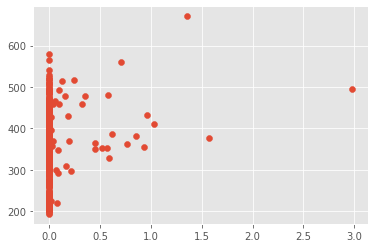

In [17]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(rains_corr, means_corr)
plt.show()

In [18]:
traffic_data = []
rain_data = []
for i in range(len(rains_corr)):
    if rains_corr[i] != 0:
        traffic_data.append(means_corr[i])
        rain_data.append(rains_corr[i])
print(len(traffic_data))
print(len(rain_data))

38
38


In [19]:
covariance_cleaned = cov(rain_data, traffic_data)
pcorr_cleaned, _ = pearsonr(rain_data, traffic_data)
scorr_cleaned, _ = spearmanr(rain_data, traffic_data)

print(covariance_cleaned)
print(pcorr_cleaned)
print(scorr_cleaned)

[[3.32833899e-01 1.54994237e+01]
 [1.54994237e+01 8.32864580e+03]]
0.2943842551618684
0.23385508020999876


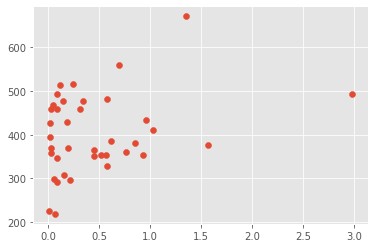

In [20]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(rain_data, traffic_data)
plt.show()